In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
ds=pd.read_csv("Furniture Price Prediction.csv")

In [39]:
display(ds)

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


In [40]:
ds.columns

Index(['furniture', 'type', 'url', 'rate', 'delivery', 'sale', 'price'], dtype='object')

In [41]:
ds.shape

(2000, 7)

In [42]:
ds=ds.drop('url',axis=1)

In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   rate       2000 non-null   float64
 3   delivery   2000 non-null   float64
 4   sale       2000 non-null   object 
 5   price      1961 non-null   float64
dtypes: float64(3), object(3)
memory usage: 93.9+ KB


In [44]:
ds.isna().any()

furniture    False
type         False
rate         False
delivery     False
sale         False
price         True
dtype: bool

In [45]:
ds.isna().sum()

furniture     0
type          0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [46]:
ds['price'].fillna(ds['price'].mean(skipna=True),inplace=True)

In [47]:
ds.isnull().any()

furniture    False
type         False
rate         False
delivery     False
sale         False
price        False
dtype: bool

In [48]:
ds['furniture'].unique()

array(['Bed side table with storage shelf ', 'Modern Zigzag TV Table ',
       'Bedside table with storage shelf ', ...,
       'Sofa Chair Bean Bag Flocking PVC Garden Lounge',
       "Casio Standard Analogue Ladys Standard Analog Women's LTP-V005G-9A",
       'Coffee table + side table'], dtype=object)

In [49]:
ds['type'].unique()

array(['Home Decor Center', 'Modern Home',
       'Modern Home Modern Tv Table   Black Oak',
       'Modern Home Modern Table            cm   Light Brown',
       'Sarcomisr Manager Medical Office Chair   Black   White',
       'Rattan Folding Table   Biege',
       'Modern Home                                                                 W',
       'General', 'Sarcomisr', 'tv covers Protector', 'Gad Woods',
       'Modern Home Home  Studying Desk     x  x      White', 'Homztown',
       'Minihomz', 'Modern Home GR', 'Minihomz           minihomz',
       'Home  Studying Desk     x  x      White',
       'Low Pvc Hard Back Chair   Black',
       'Modern Home                                         T',
       'Modern Home Tv Table       Cm    Brown',
       'Modern Home Office Desk              White', 'Arikaty',
       'Modern Home Modern Library With Matching Shelves  White W',
       'Modern Home                         x',
       'Home  Studying Desk     x  x      White   Brown', 

In [50]:
ds['sale'].unique()

array(['72%', '54%', '18%', '58%', '53%', '68%', '0%', '41%', '28%',
       '16%', '43%', '25%', '15%', '56%', '17%', '20%', '29%', '50%',
       '70%', '23%', '13%', '33%', '69%', '32%', '31%', '60%', '40%',
       '30%', '46%', '8%', '11%', '12%', '52%', '14%', '6%', '73%', '63%',
       '35%', '4%', '21%', '10%', '62%', '45%', '36%', '38%', '48%',
       '22%', '9%', '66%', '19%', '47%', '7%', '57%', '42%', '27%', '44%',
       '64%', '5%', '24%', '37%', '34%', '55%', '59%', '26%', '1%', '49%',
       '39%', '65%', '61%', '3%', '2%', '75%', '90%', '79%', '74%', '76%',
       '67%', '83%', '81%', '84%', '51%'], dtype=object)

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
en=OrdinalEncoder()

In [54]:
a=['furniture']
b=['type']
c=['sale']
ds[a]=en.fit_transform(ds[a])
ds[b]=en.fit_transform(ds[b])
ds[c]=en.fit_transform(ds[c])

In [55]:
ds=ds.astype({'furniture':'int','type':'int','sale':'int'})

In [56]:
ds

,furniture,type,rate,delivery,sale,price
0,193,173,3.3,172.14,69,2500.0
1,193,272,0.0,172.14,50,1200.0
2,746,272,0.0,172.14,10,1099.0
3,199,272,0.0,172.14,54,1200.0
4,1140,272,5.0,52.44,50,1400.0
...,...,...,...,...,...,...
1995,267,53,0.0,656.28,0,1632.0
1996,300,213,0.0,172.14,0,11450.0
1997,217,35,0.0,52.44,0,550.0
1998,285,45,0.0,172.14,79,8495.0


In [57]:
cor=ds.corr()
cor.style.background_gradient()

,furniture,type,rate,delivery,sale,price
furniture,1.000000,0.305729,0.051505,-0.007467,0.022923,-0.002174
type,0.305729,1.000000,0.065700,0.106184,0.097863,-0.127824
rate,0.051505,0.065700,1.000000,-0.112733,0.029603,-0.020387
delivery,-0.007467,0.106184,-0.112733,1.000000,0.085535,0.098758
sale,0.022923,0.097863,0.029603,0.085535,1.000000,-0.124670
price,-0.002174,-0.127824,-0.020387,0.098758,-0.124670,1.000000


In [58]:
from sklearn.model_selection import train_test_split

In [60]:
x=ds.iloc[:,0:6]
print(x)
y=ds['price']
print(y)

      furniture  type  rate  delivery  sale    price
0           193   173   3.3    172.14    69   2500.0
1           193   272   0.0    172.14    50   1200.0
2           746   272   0.0    172.14    10   1099.0
3           199   272   0.0    172.14    54   1200.0
4          1140   272   5.0     52.44    50   1400.0
...         ...   ...   ...       ...   ...      ...
1995        267    53   0.0    656.28     0   1632.0
1996        300   213   0.0    172.14     0  11450.0
1997        217    35   0.0     52.44     0    550.0
1998        285    45   0.0    172.14    79   8495.0
1999        307    45   0.0    172.14     2  10775.0

[2000 rows x 6 columns]
0        2500.0
1        1200.0
2        1099.0
3        1200.0
4        1400.0
         ...   
1995     1632.0
1996    11450.0
1997      550.0
1998     8495.0
1999    10775.0
Name: price, Length: 2000, dtype: float64


In [61]:
ptrain,ptest,qtrain,qtest=train_test_split(x,y,test_size=0.2,random_state=0)


In [62]:
# Scaling.
from sklearn.preprocessing import StandardScaler

In [63]:
scl=StandardScaler()

In [64]:
ptrain=scl.fit_transform(ptrain)
ptest=scl.transform(ptest)

In [65]:
ptrain

array([[-0.05439401, -0.38992219,  2.62243173, -0.63008849,  0.61374337,
        -0.52873927],
       [-0.50001094,  0.08395923,  1.69700368, -0.63008849,  0.47710925,
        -0.51919938],
       [-1.65286506,  0.9114835 , -0.46232843, -0.46539313,  0.34047514,
        -0.71722742],
       ...,
       [ 1.09271021,  0.08395923, -0.46232843, -0.63008849, -0.8892319 ,
        -0.73083431],
       [-1.23024771, -1.74791073, -0.46232843,  0.20242984,  2.43553158,
         0.76391583],
       [-0.52876042,  0.08395923,  1.38852766, -0.63008849, -0.8892319 ,
        -0.72079232]])

In [66]:
qtrain

582      850.0
159      888.0
1827      99.2
318      888.0
708     2000.0
         ...  
835     5500.0
1216    5850.0
1653      45.0
559     5999.0
684       85.0
Name: price, Length: 1600, dtype: float64

In [67]:
# Model Building.
from sklearn.linear_model import LinearRegression

In [68]:
mod=LinearRegression()

In [69]:
mod.fit(ptrain,qtrain)
import os
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Fit the linear regression model on the scaled training data
mod = LinearRegression()
mod.fit(ptrain, qtrain)

# Save the trained scaler to a file
scaler_filename = "scaler.save"
joblib.dump(scl, scaler_filename)

# Save the trained model to a file
model_filename = "linear_regression_model.save"
joblib.dump(mod, model_filename)


['linear_regression_model.save']

In [70]:
pred=mod.predict(ptest)
print(pred)

[6.00000000e+03 3.00000000e+03 3.07000000e+02 4.00000000e+03
 9.99000000e+02 1.50000000e+02 3.50000000e+02 5.40000000e+02
 2.00000000e+03 1.09900000e+03 2.70000000e+03 1.90000000e+03
 1.65000000e+03 3.99000000e+02 7.00000000e+03 3.90900000e+03
 6.50000000e+03 4.70000000e+02 2.29800000e+03 1.30000000e+03
 4.02000000e+03 7.00000000e+03 6.40000000e+03 9.73380000e+02
 2.88800000e+03 1.15000000e+03 6.20000000e+03 3.50000000e+02
 1.60000000e+03 2.91041819e+03 6.00000000e+03 2.05368000e+03
 4.76400000e+03 9.99000000e+02 9.00000000e+02 1.85000000e+03
 2.80000000e+03 1.99900000e+03 3.00000000e+03 1.41440000e+02
 1.40000000e+03 4.50000000e+03 3.25000000e+04 3.50000000e+02
 1.25000000e+03 5.00000000e+03 3.40090000e+02 1.32000000e+03
 1.08245000e+03 6.00000000e+03 3.93000000e+02 6.11500000e+03
 3.00000000e+03 2.44000000e+02 2.99000000e+02 3.00000000e+03
 2.30000000e+02 1.31008000e+03 4.99000000e+02 4.50000000e+03
 3.33000000e+02 3.50000000e+03 2.00000000e+03 3.62000000e+02
 2.00000000e+03 5.000000

In [71]:
# R-Squraed Term.
from sklearn.metrics import r2_score

In [72]:
score=r2_score(qtest,pred)
print("R Squared Term is:",score*100)

R Squared Term is: 100.0


<Axes: xlabel='price'>

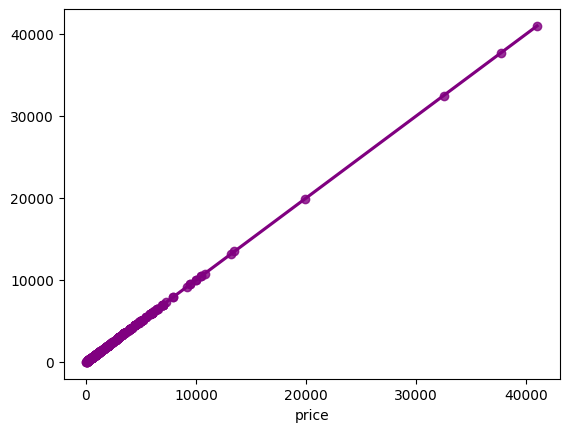

In [73]:
# Plotting.
sns.regplot(data=ds,x=qtest,y=pred,color='purple')